In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

def lowpass(data, window = 20): 
    out = []
    for idx, el in enumerate(data):  
        if idx + window <= len(data): 
            out.append(sum(data[idx:idx + window]) / window)
        else: 
            out.append(sum(data[idx:-(idx + window - len(data))]) / window)
    return out


gnp done
smw done
scf done


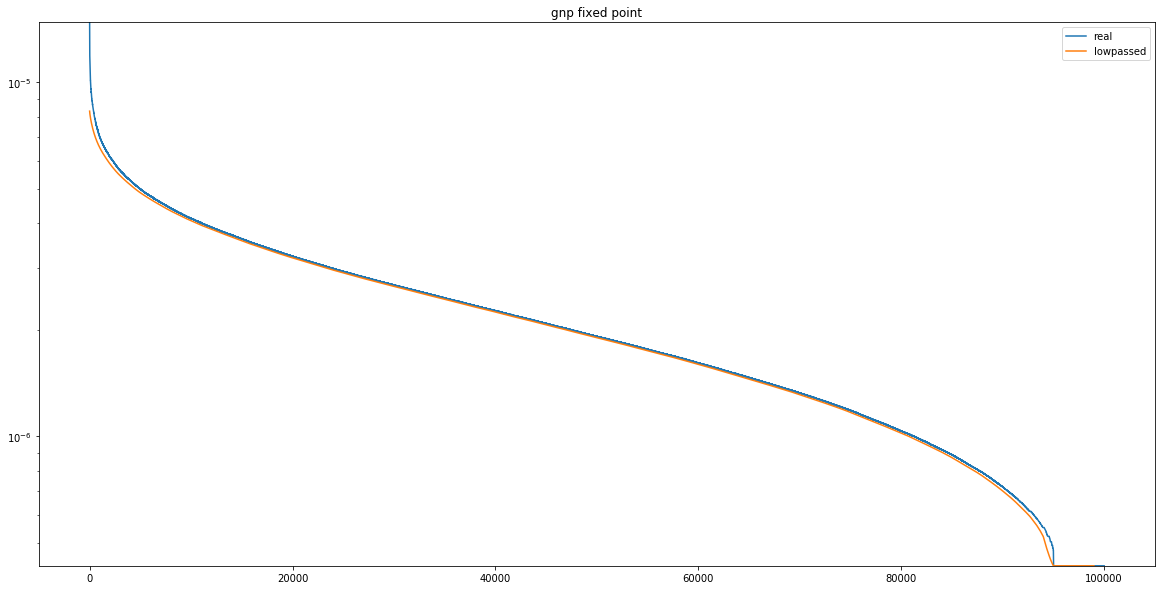

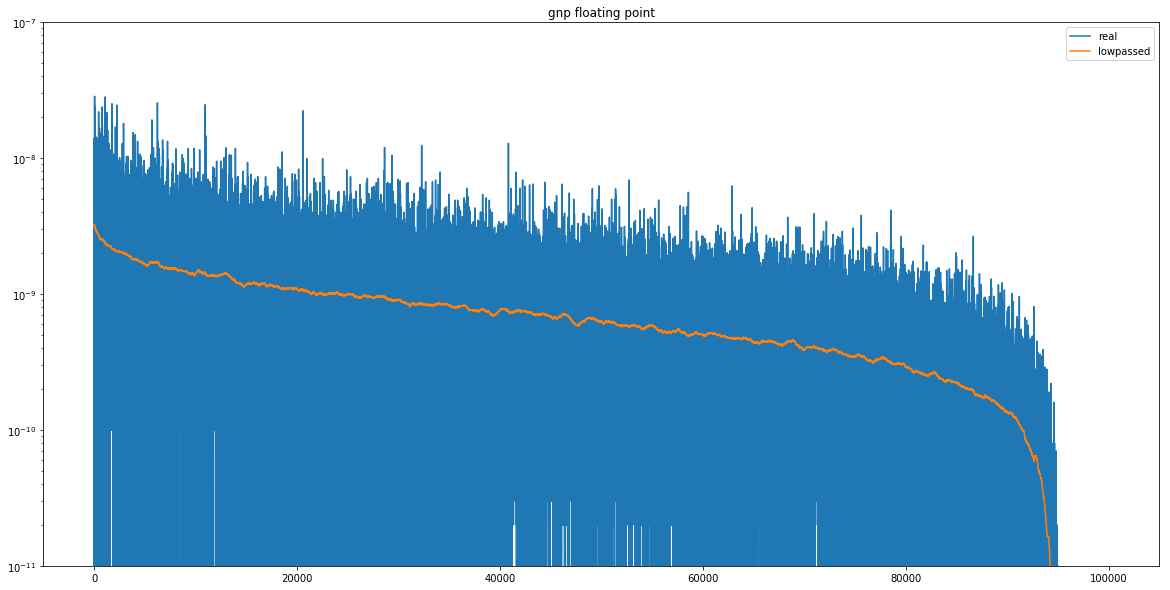

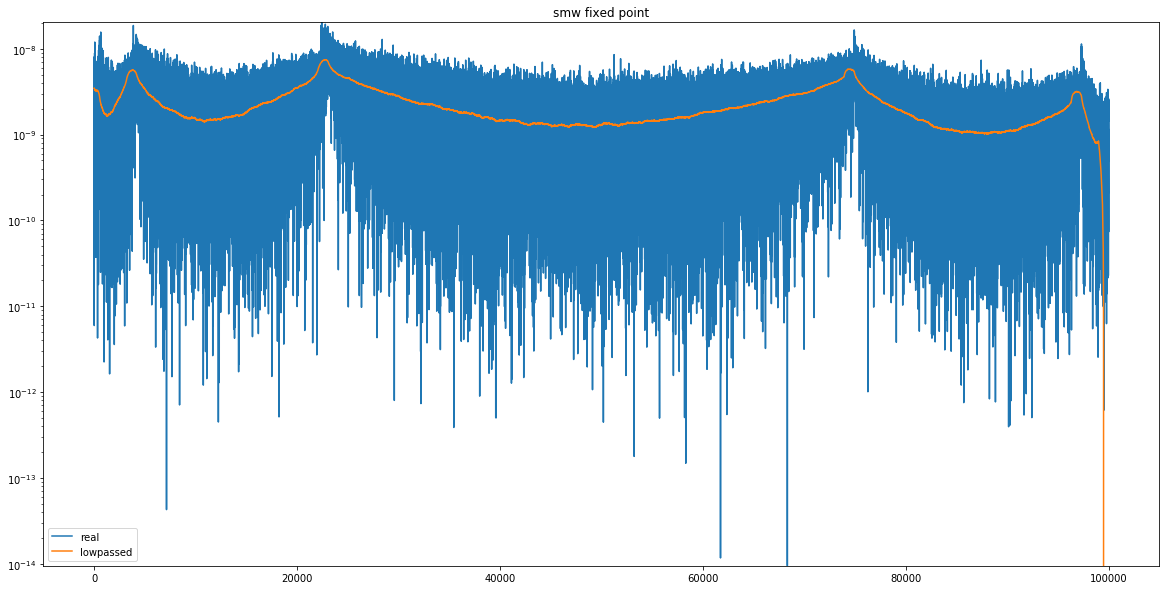

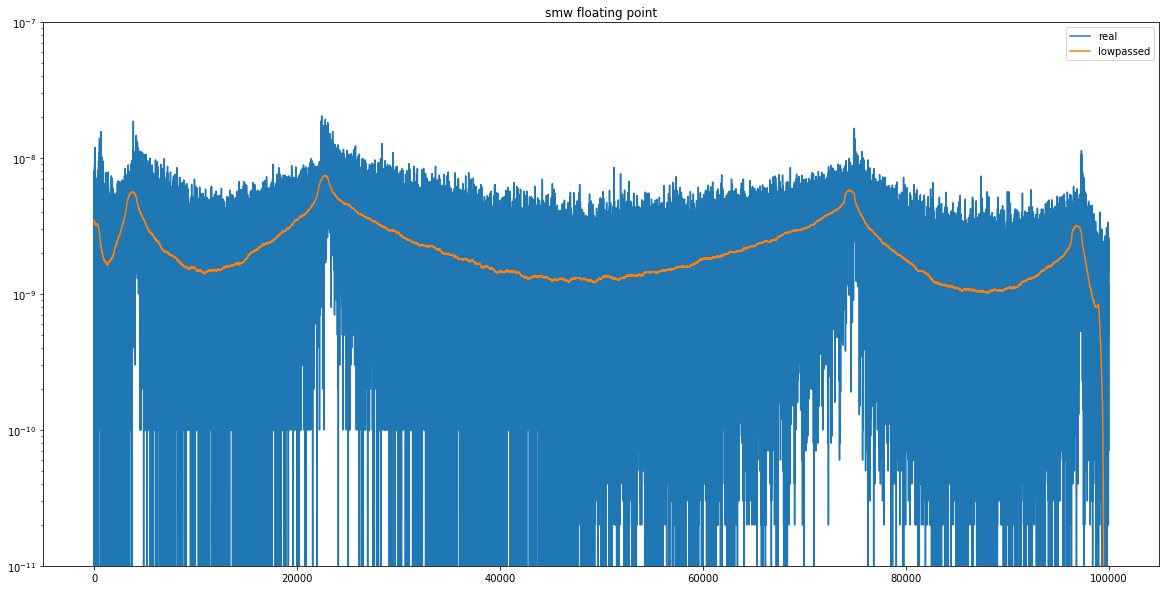

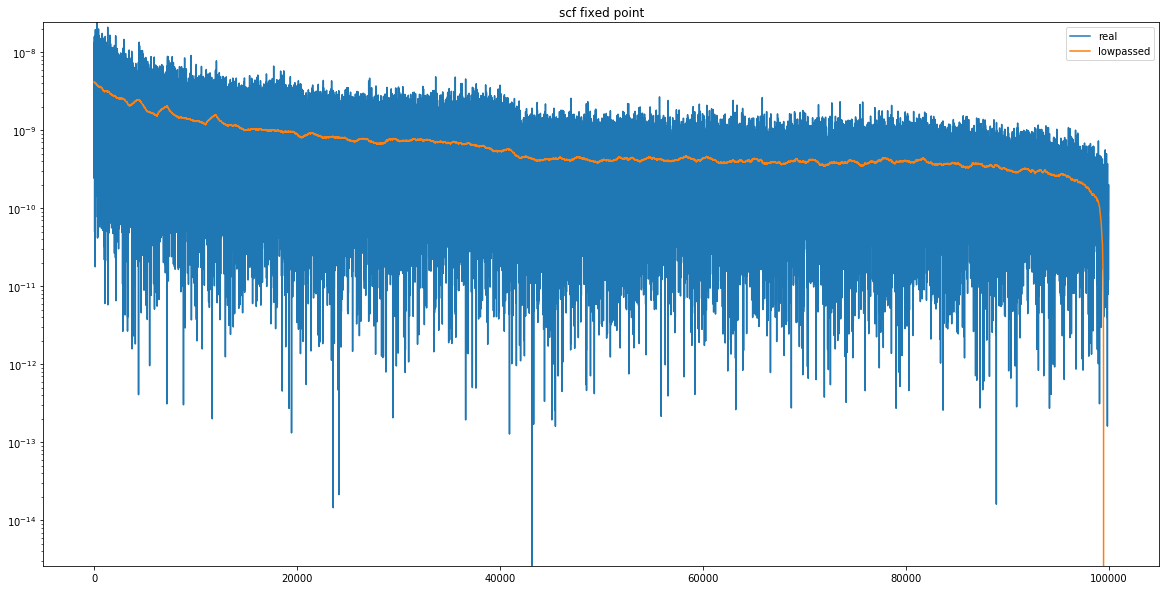

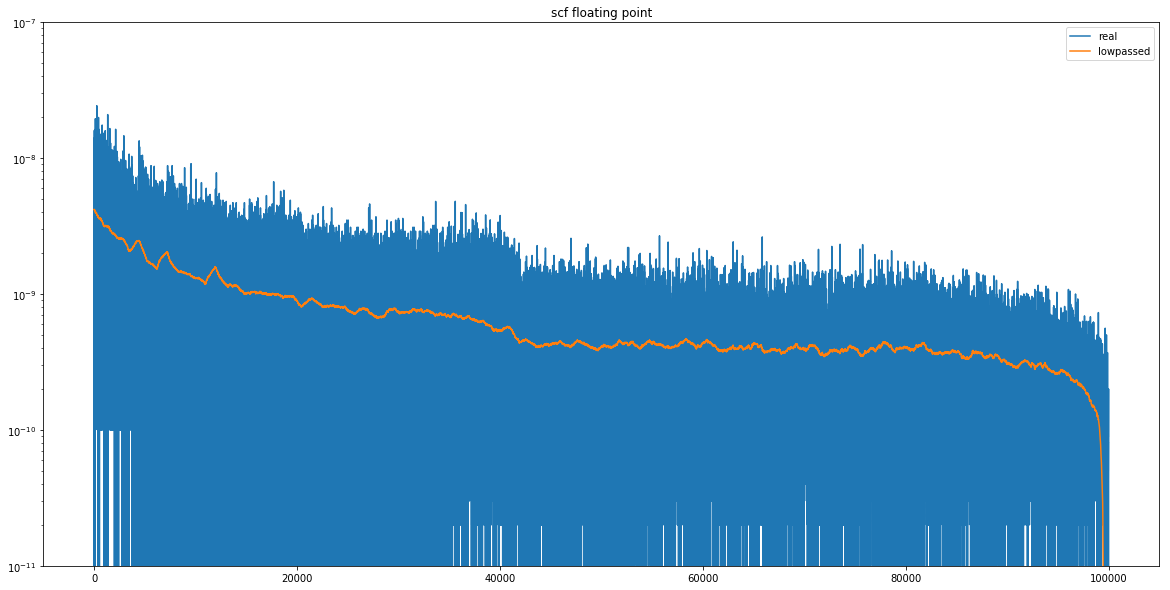

In [54]:
for graph in tqdm_notebook(["gnp", "smw", "scf"]): 
    fixed = {}
    floating = {}
    real = {}
    
    with open(f"../new_ds/measurements/{graph}/fixed/displacement") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            fixed[key] = int(value) / (1 << 62)

    with open(f"../new_ds/measurements/{graph}/floating/displacement") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            floating[key] = float(value)
    
    with open(f"../new_ds/measurements/{graph}/parra/{graph}_eff") as f: 
        for i in f.readlines(): 
            key, value =  i.strip().split(',')
            real[key] = float(value)
            
    offset_fixed = []
    offset_floating = []
    for idx, val in fixed.items():
        real_val = real[idx]
        offset_fixed.append(abs(real_val - val))
    
    for idx, val in floating.items(): 
        real_val = real[idx]
        offset_floating.append(abs(real_val - val))

    offset_fixed_lp    = lowpass(offset_fixed, window=1000)
    offset_floating_lp = lowpass(offset_floating, window=1000)
    
    plt.figure(figsize=(20, 10))
    ax = sns.lineplot(x=list(range(len(offset_fixed))), y=offset_fixed, label="real")
    ax.set(yscale="log", title=f"{graph} fixed point")
    sns.lineplot(x=list(range(len(offset_fixed))), y=offset_fixed_lp, ax=ax,  label="lowpassed", legend="full")
    plt.ylim((min(offset_fixed), max(offset_fixed)))
    
    plt.savefig(f'figures/pagerank_displ/{graph}_fixed.png')
    
    plt.figure(figsize=(20, 10))
    ax = sns.lineplot(x=list(range(len(offset_floating))), y=offset_floating, label="real")
    ax.set(yscale="log", title=f"{graph} floating point")
    sns.lineplot(x=list(range(len(offset_floating))), y=offset_floating_lp, ax=ax,  label="lowpassed", legend="full")
    plt.ylim((10**-11, 10**-7))
    
    plt.savefig(f'figures/pagerank_displ/{graph}_floating.png')
    print(graph, "done")
    
    